In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/purchases.txt'


In [ ]:
# Read the tab-delimited text file into a DataFrame
data = pd.read_csv(file_path, header=None, sep="\t", decimal='.')

# Rename columns
data.columns = ["customer_id", "purchase_amount", "date_of_purchase"]

# Print the first few rows of the DataFrame
print(data.head())

   customer_id  purchase_amount date_of_purchase
0          760             25.0       2009-11-06
1          860             50.0       2012-09-28
2         1200            100.0       2005-10-25
3         1420             50.0       2009-07-09
4         1940             70.0       2013-01-25


In [ ]:
len(data)

51243

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       51243 non-null  int64  
 1   purchase_amount   51243 non-null  float64
 2   date_of_purchase  51243 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
data.describe()

,customer_id,purchase_amount
count,51243.000000,51243.000000
mean,108934.547938,62.337195
std,67650.610139,156.606801
min,10.000000,5.000000
25%,57720.000000,25.000000
50%,102440.000000,30.000000
75%,160525.000000,60.000000
max,264200.000000,4500.000000


In [ ]:
data.isnull().sum()

customer_id         0
purchase_amount     0
date_of_purchase    0
dtype: int64

In [ ]:
# Convert date column to datetime format
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'], format='%Y-%m-%d')
data['year_of_purchase'] = data['date_of_purchase'].dt.year

In [ ]:
data.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [ ]:
pd.crosstab(data.year_of_purchase, values = data.purchase_amount, aggfunc='sum', columns="Sum of purchases")

col_0,Sum of purchases
year_of_purchase,
2005,82064.40
2006,114010.49
2007,230260.00
2008,229853.88
2009,256466.51
2010,290116.92
2011,303939.85
2012,374963.34
2013,401610.18


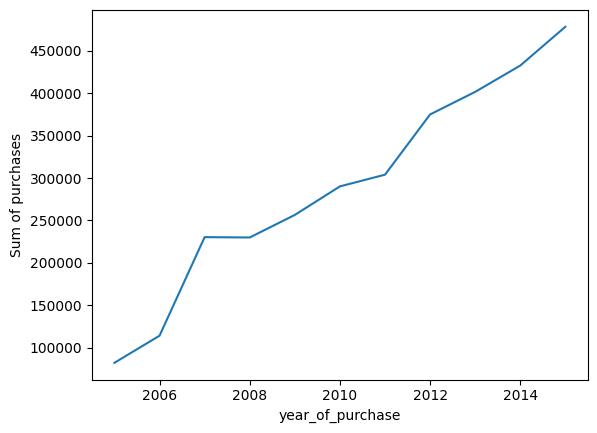

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create crosstab
ct_purchase = pd.crosstab(data['year_of_purchase'], values=data['purchase_amount'], aggfunc='sum', columns="Sum of purchases")


# Create bar plot
sns.lineplot(data=ct_purchase, x=ct_purchase.index, y=ct_purchase['Sum of purchases'])

# Show the plot
plt.show()


In [ ]:
# Calculate days since last purchase
data['days_since'] = (datetime(2016, 1, 1) - data['date_of_purchase']).dt.days

In [ ]:
data.columns

Index(['customer_id', 'purchase_amount', 'date_of_purchase',
       'year_of_purchase', 'days_since'],
      dtype='object')

# Converting transaction data to customers data

In [ ]:
customers = data.groupby('customer_id').agg({
    'days_since': 'min',
    'purchase_amount': 'mean',
    'customer_id': 'count'
}).rename(columns={
    'days_since': 'recency',
    'purchase_amount': 'monetary_value',
    'customer_id': 'frequency'
}).reset_index()


In [ ]:
len(customers)

18417

In [ ]:
customers.describe()

,customer_id,recency,monetary_value,frequency
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,1253.037900,57.792985,2.782375
std,69504.599881,1081.437868,154.360109,2.936888
min,10.000000,1.000000,5.000000,1.000000
25%,81990.000000,244.000000,21.666667,1.000000
50%,136430.000000,1070.000000,30.000000,2.000000
75%,195100.000000,2130.000000,50.000000,3.000000
max,264200.000000,4014.000000,4500.000000,45.000000


In [ ]:
customers.head()


,customer_id,recency,monetary_value,frequency
0,10,3829,30.000000,1
1,80,343,71.428571,7
2,90,758,115.800000,10
3,120,1401,20.000000,1
4,130,2970,50.000000,2


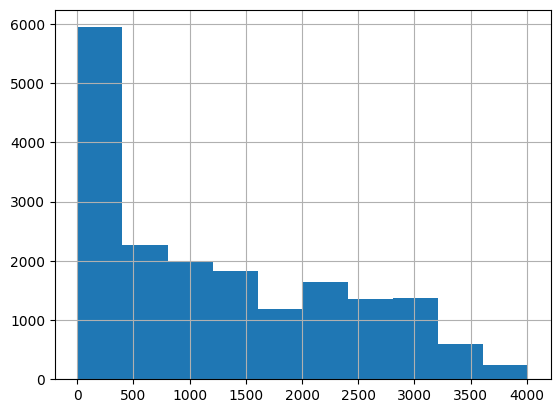

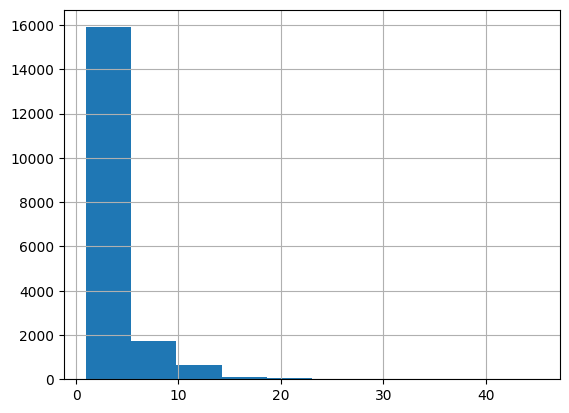

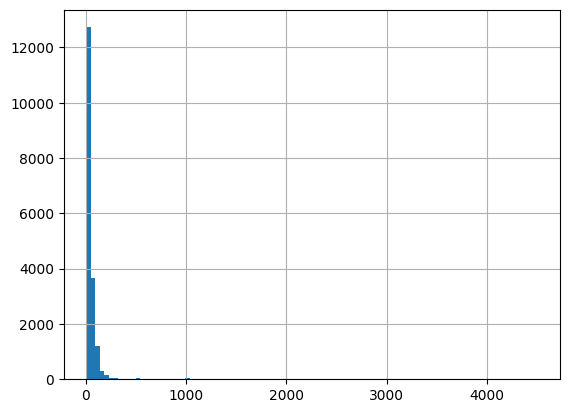

In [ ]:
# Histograms for recency, frequency, and amount
customers['recency'].hist()
plt.show()
customers['frequency'].hist()
plt.show()
customers['monetary_value'].hist(bins=100)
plt.show()

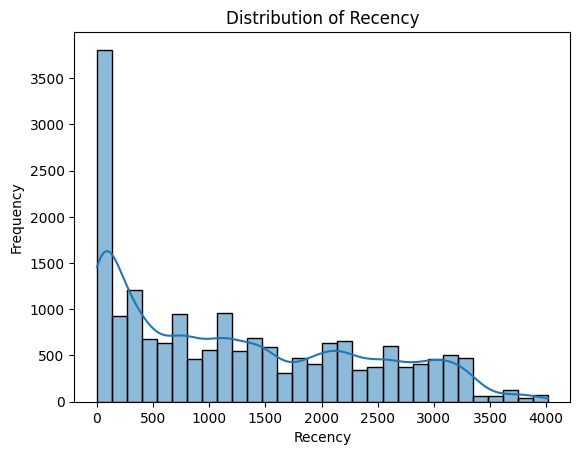

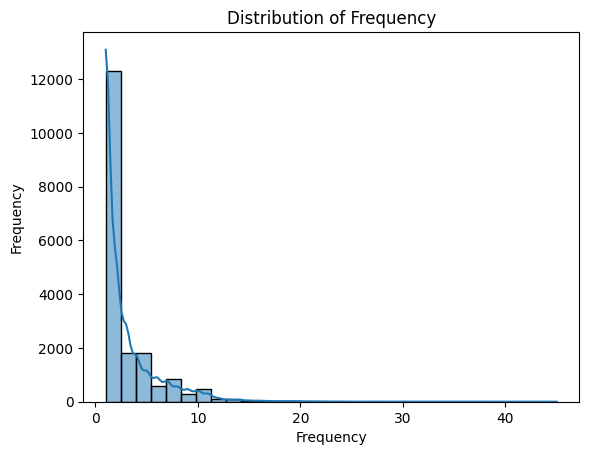

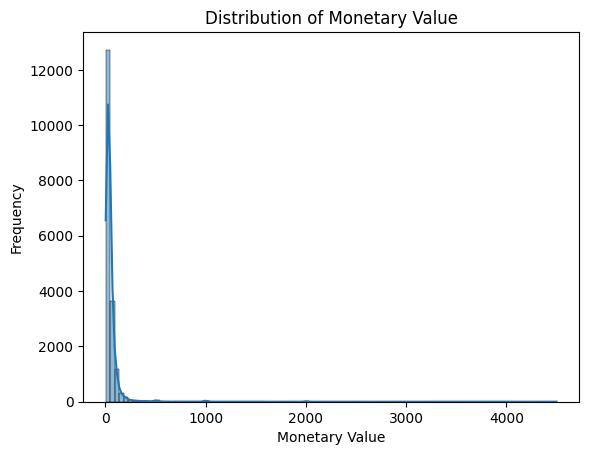

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for 'recency'
sns.histplot(customers['recency'], kde=True, bins=30)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'frequency'
sns.histplot(customers['frequency'], kde=True, bins=30)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'monetary_value' (previously 'amount')
sns.histplot(customers['monetary_value'], kde=True, bins=100)
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
customers2 = customers.copy()

# Applying log to highly skewed variable "monetary value"

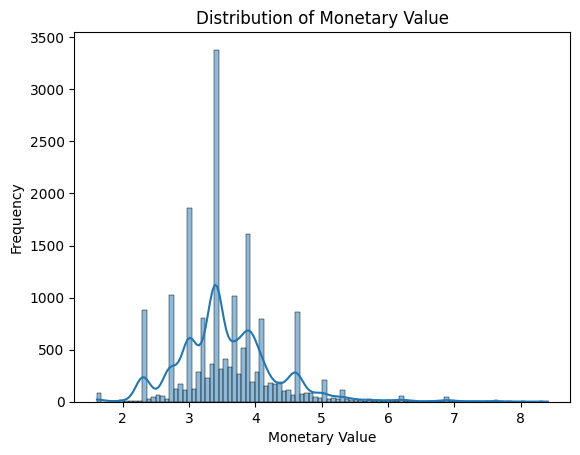

In [ ]:
# Plot histogram for 'monetary_value' (previously 'amount')
import seaborn as sns
sns.histplot(np.log(customers2['monetary_value']), kde=True, bins=100)
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
customers2.head()

,customer_id,recency,monetary_value,frequency
0,10,3829,30.000000,1
1,80,343,71.428571,7
2,90,758,115.800000,10
3,120,1401,20.000000,1
4,130,2970,50.000000,2


# Applying K Means to classify

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming customers DataFrame is already loaded with columns ['recency', 'monetary_value', 'frequency']
# Select relevant columns for clustering
features = customers[['recency', 'monetary_value', 'frequency']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means with 7 clusters
kmeans = KMeans(n_clusters=11, random_state=42)
customers['cluster'] = kmeans.fit_predict(scaled_features)

# Print the first few rows to verify
print(customers.head())

# Get cluster centers (means of the features for each cluster)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['recency', 'monetary_value', 'frequency'])
cluster_centers_df['cluster'] = range(11)

# Get the number of members in each cluster
cluster_counts = customers['cluster'].value_counts().sort_index()
cluster_centers_df['num_members'] = cluster_counts.values

print("\nCluster Centers with Number of Members:")
print(cluster_centers_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   customer_id  recency  monetary_value  frequency  cluster
0           10     3829       30.000000          1        2
1           80      343       71.428571          7        7
2           90      758      115.800000         10        0
3          120     1401       20.000000          1        9
4          130     2970       50.000000          2        2

Cluster Centers with Number of Members:
        recency  monetary_value  frequency  cluster  num_members
0    248.031721       62.093112   9.806503        0         1260
1   1585.932455       46.519737   4.405272        1         1212
2   3099.953003       36.132559   1.225289        2         2674
3   1380.693878     1796.732012   2.408163        3           49
4    793.839286      720.266991   2.636905        4          168
5   2190.057456       35.377020   1.499032        5         3103
6    216.099248       49.982520   1.688722        6         3990
7    233.416540       53.945116   5.316591        7         1971
8    783.23076

In [ ]:
cluster_centers_df

,recency,monetary_value,frequency,cluster,num_members
0,248.031721,62.093112,9.806503,0,1260
1,1585.932455,46.519737,4.405272,1,1212
2,3099.953003,36.132559,1.225289,2,2674
3,1380.693878,1796.732012,2.408163,3,49
4,793.839286,720.266991,2.636905,4,168
5,2190.057456,35.377020,1.499032,5,3103
6,216.099248,49.982520,1.688722,6,3990
7,233.416540,53.945116,5.316591,7,1971
8,783.230769,3603.365385,2.307692,8,13
9,1091.813674,40.288910,1.337161,9,3837


In [ ]:
cluster_centers_df[['recency' , 'monetary_value'  ,'frequency']] = cluster_centers_df[['recency' , 'monetary_value'  ,'frequency']].round().astype('int')

In [ ]:
cluster_centers_df = cluster_centers_df[cluster_centers_df['num_members']>200]

In [ ]:
cluster_centers_df

,recency,monetary_value,frequency,cluster,num_members
0,248,62,10,0,1260
1,1586,47,4,1,1212
2,3100,36,1,2,2674
5,2190,35,1,5,3103
6,216,50,2,6,3990
7,233,54,5,7,1971
9,1092,40,1,9,3837


## Discarded Customers:
## Cluster 3: 49
## Cluster 4: 168
## Cluster 8: 13
## Cluster 10: 140
## Total: 370

In [ ]:
cluster_centers_df = cluster_centers_df[['cluster', 'recency', 'frequency', 'monetary_value', 'num_members']]

In [ ]:
cluster_centers_df

,cluster,recency,frequency,monetary_value,num_members
0,0,248,10,62,1260
1,1,1586,4,47,1212
2,2,3100,1,36,2674
5,5,2190,1,35,3103
6,6,216,2,50,3990
7,7,233,5,54,1971
9,9,1092,1,40,3837


In [ ]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (cluster_centers_df['frequency'] <= 2),
    (cluster_centers_df['frequency'] > 2) & (cluster_centers_df['frequency'] <= 5),
    (cluster_centers_df['frequency'] > 5) & (cluster_centers_df['frequency'] <= 10)
]
choices = [1,2,3]

# Use np.select to apply the conditions
cluster_centers_df['frequency_score'] = np.select(conditions, choices, default='Exceptional')

# Verify the changes
print(cluster_centers_df)

   cluster  recency  frequency  monetary_value  num_members frequency_score
0        0      248         10              62         1260               3
1        1     1586          4              47         1212               2
2        2     3100          1              36         2674               1
5        5     2190          1              35         3103               1
6        6      216          2              50         3990               1
7        7      233          5              54         1971               2
9        9     1092          1              40         3837               1


<ipython-input-33-306782fcf1d7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_centers_df['frequency_score'] = np.select(conditions, choices, default='Exceptional')


In [ ]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (cluster_centers_df['recency'] <= 365),
    (cluster_centers_df['recency'] > 365) & (cluster_centers_df['recency'] <= 730),
    (cluster_centers_df['recency'] > 730) & (cluster_centers_df['recency'] <= 1095)
]
choices = [3,2,1]

# Use np.select to apply the conditions
cluster_centers_df['recency_score'] = np.select(conditions, choices, default='Lost')

# Verify the changes
print(cluster_centers_df)

   cluster  recency  frequency  monetary_value  num_members frequency_score  \
0        0      248         10              62         1260               3   
1        1     1586          4              47         1212               2   
2        2     3100          1              36         2674               1   
5        5     2190          1              35         3103               1   
6        6      216          2              50         3990               1   
7        7      233          5              54         1971               2   
9        9     1092          1              40         3837               1   

  recency_score  
0             3  
1          Lost  
2          Lost  
5          Lost  
6             3  
7             3  
9             1  


<ipython-input-34-1f45e3f2d3bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_centers_df['recency_score'] = np.select(conditions, choices, default='Lost')


In [ ]:
cluster_centers_df['monetary_value'].mean()

46.285714285714285

In [ ]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (cluster_centers_df['monetary_value'] >= 56),
    (cluster_centers_df['monetary_value'] >= 46) & (cluster_centers_df['monetary_value'] < 56),
    (cluster_centers_df['monetary_value'] >= 36) & (cluster_centers_df['monetary_value'] < 46)
]
choices = [3,2,1]

# Use np.select to apply the conditions
cluster_centers_df['monetary_value_score'] = np.select(conditions, choices, default='Of No Value')

# Verify the changes
print(cluster_centers_df)

   cluster  recency  frequency  monetary_value  num_members frequency_score  \
0        0      248         10              62         1260               3   
1        1     1586          4              47         1212               2   
2        2     3100          1              36         2674               1   
5        5     2190          1              35         3103               1   
6        6      216          2              50         3990               1   
7        7      233          5              54         1971               2   
9        9     1092          1              40         3837               1   

  recency_score monetary_value_score  
0             3                    3  
1          Lost                    2  
2          Lost                    1  
5          Lost          Of No Value  
6             3                    2  
7             3                    2  
9             1                    1  


<ipython-input-36-8c95c0710557>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_centers_df['monetary_value_score'] = np.select(conditions, choices, default='Of No Value')


In [ ]:
cluster_centers_df['RFM_score'] = (cluster_centers_df['recency_score'] +
                                   cluster_centers_df['frequency_score'] +
                                   cluster_centers_df['monetary_value_score'])


<ipython-input-37-c5ce6498d9d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_centers_df['RFM_score'] = (cluster_centers_df['recency_score'] +


In [ ]:
cluster_centers_df

,cluster,recency,frequency,monetary_value,num_members,frequency_score,recency_score,monetary_value_score,RFM_score
0,0,248,10,62,1260,3,3,3,333
1,1,1586,4,47,1212,2,Lost,2,Lost22
2,2,3100,1,36,2674,1,Lost,1,Lost11
5,5,2190,1,35,3103,1,Lost,Of No Value,Lost1Of No Value
6,6,216,2,50,3990,1,3,2,312
7,7,233,5,54,1971,2,3,2,322
9,9,1092,1,40,3837,1,1,1,111


In [ ]:
cluster_centers_df[['cluster',	'recency',	'frequency',	'monetary_value',	'num_members', 'RFM_score']]

,cluster,recency,frequency,monetary_value,num_members,RFM_score
0,0,248,10,62,1260,333
1,1,1586,4,47,1212,Lost22
2,2,3100,1,36,2674,Lost11
5,5,2190,1,35,3103,Lost1Of No Value
6,6,216,2,50,3990,312
7,7,233,5,54,1971,322
9,9,1092,1,40,3837,111


In [ ]:
cluster_centers_df = cluster_centers_df[cluster_centers_df['RFM_score'].str[:4] != "Lost"]

In [ ]:
cluster_centers_df

,cluster,recency,frequency,monetary_value,num_members,frequency_score,recency_score,monetary_value_score,RFM_score
0,0,248,10,62,1260,3,3,3,333
6,6,216,2,50,3990,1,3,2,312
7,7,233,5,54,1971,2,3,2,322
9,9,1092,1,40,3837,1,1,1,111


In [ ]:
cluster_centers_df2 = cluster_centers_df[['cluster'	,'recency',	'frequency'	,'monetary_value'	,'num_members', 'RFM_score']]

In [ ]:
cluster_centers_df2

,cluster,recency,frequency,monetary_value,num_members,RFM_score
0,0,248,10,62,1260,333
6,6,216,2,50,3990,312
7,7,233,5,54,1971,322
9,9,1092,1,40,3837,111


# Making clusters by logic

In [ ]:
customers2.head()

,customer_id,recency,monetary_value,frequency
0,10,3829,30.000000,1
1,80,343,71.428571,7
2,90,758,115.800000,10
3,120,1401,20.000000,1
4,130,2970,50.000000,2


In [ ]:
len(customers)

18417

In [ ]:
customers.drop(columns='cluster', inplace=True)

In [ ]:
customers.describe()

,customer_id,recency,monetary_value,frequency
count,18417.000000,18417.000000,18417.000000,18417.000000
mean,137573.510887,1253.037900,57.792985,2.782375
std,69504.599881,1081.437868,154.360109,2.936888
min,10.000000,1.000000,5.000000,1.000000
25%,81990.000000,244.000000,21.666667,1.000000
50%,136430.000000,1070.000000,30.000000,2.000000
75%,195100.000000,2130.000000,50.000000,3.000000
max,264200.000000,4014.000000,4500.000000,45.000000


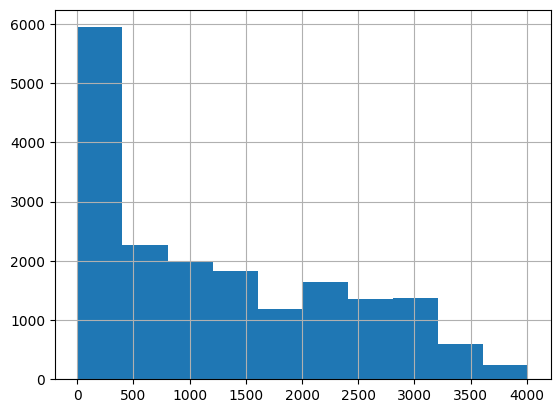

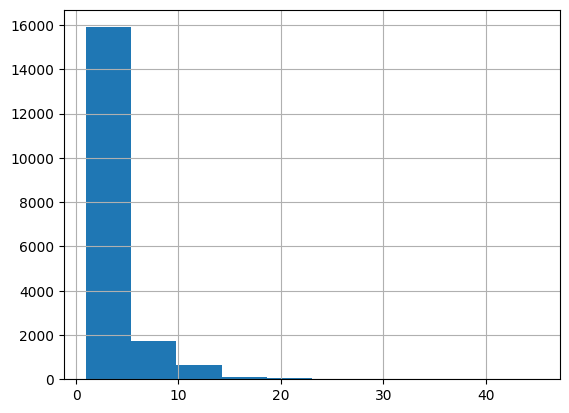

In [ ]:
# Histograms for recency, frequency, and amount
customers['recency'].hist()
plt.show()
customers['frequency'].hist()
plt.show()

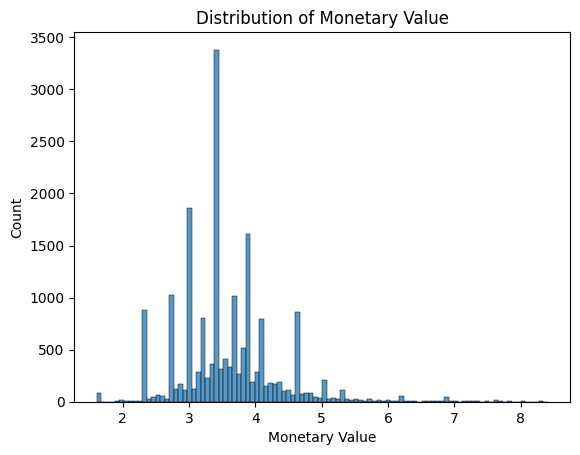

In [ ]:
# Plot for 'monetary_value'
sns.histplot(np.log(customers['monetary_value']), bins=100, kde=False)
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.title('Distribution of Monetary Value')
plt.show()


In [ ]:
pd.crosstab(customers['recency'], values = customers['recency'], aggfunc = 'count', columns="Freq. of recency")

col_0,Freq. of recency
recency,
1,461
2,108
3,160
4,4
5,3
...,...
4000,2
4005,2
4010,1


In [ ]:
customer_copy = customers.copy()

In [ ]:
customers['Total_monetary_value'] = customers['frequency'] * customers['monetary_value']

In [ ]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (customers['recency'] <= 365),
    (customers['recency'] > 365) & (customers['recency'] <= 730),
    (customers['recency'] > 730) & (customers['recency'] <= 1095)
]
choices = [3,2,1]

# Use np.select to apply the conditions
customers['recency'] = np.select(conditions, choices, default=0)

# Verify the changes
print(customers['recency'])


0        0
1        3
2        1
3        0
4        0
        ..
18412    3
18413    3
18414    3
18415    3
18416    3
Name: recency, Length: 18417, dtype: int64


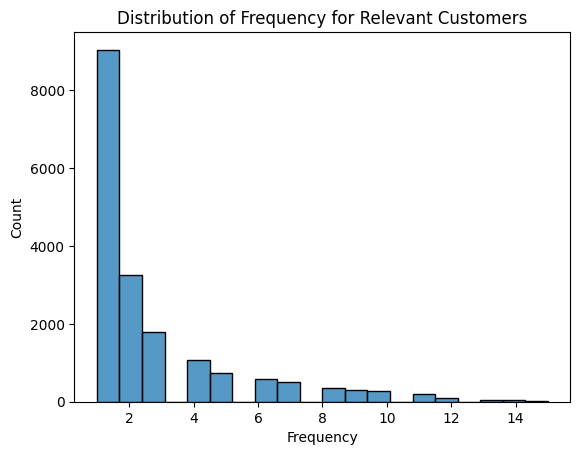

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram for 'frequency'
sns.histplot(customers[customers['frequency']<=15]['frequency'], kde=False, bins=20)
plt.title('Distribution of Frequency for Relevant Customers')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()


In [ ]:
pd.crosstab(customers['frequency'], values = customers['frequency'], aggfunc = 'count', columns="Freq.")

col_0,Freq.
frequency,
1,9048
2,3245
3,1796
4,1080
5,729
6,579
7,497
8,360
9,298


In [ ]:
import numpy as np

# Define conditions and corresponding categories
conditions = [
    (customers['frequency'] <= 1),
    (customers['frequency'] > 1) & (customers['frequency'] <= 4),
    (customers['frequency'] > 4) & (customers['frequency'] <= 10)
]
choices = [0,1,2]

# Use np.select to apply the conditions
customers['frequency'] = np.select(conditions, choices, default=3)

# Verify the changes
print(customers['frequency'])

0        0
1        2
2        2
3        0
4        1
        ..
18412    0
18413    0
18414    0
18415    0
18416    0
Name: frequency, Length: 18417, dtype: int64


<Axes: xlabel='monetary_value', ylabel='Count'>

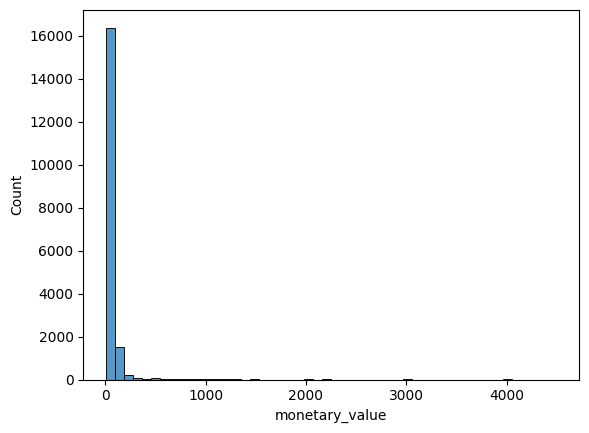

In [ ]:
sns.histplot(customers['monetary_value'], kde=False, bins=50)

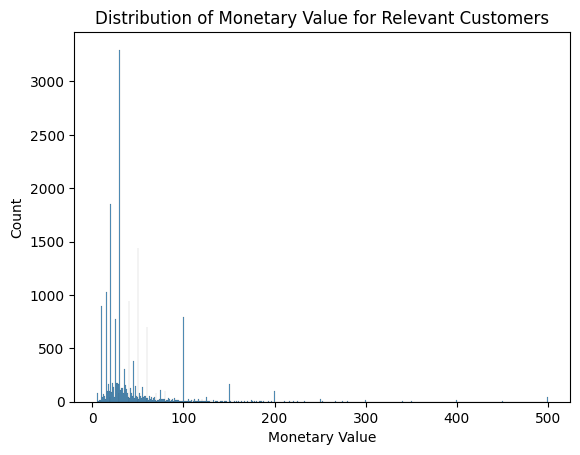

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

test = customers[customers['monetary_value']<=500]


# Plot the histogram for 'monetary_value'
sns.histplot(test['monetary_value'], kde=False, bins=500)
plt.title('Distribution of Monetary Value for Relevant Customers')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()


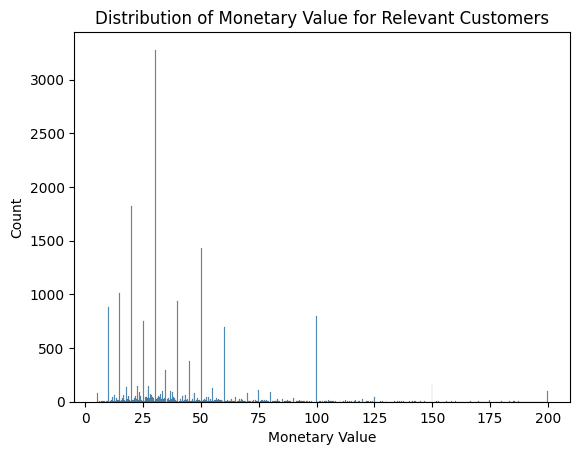

In [ ]:
test = customers[customers['monetary_value']<=200]


# Plot the histogram for 'monetary_value'
sns.histplot(test['monetary_value'], kde=False, bins=500)
plt.title('Distribution of Monetary Value for Relevant Customers')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()

In [ ]:
pd.crosstab(test[test['monetary_value']==30]['monetary_value'], values = test[test['monetary_value']==30]['monetary_value'], aggfunc = 'count', columns="Monetary_val")

col_0,Monetary_val
monetary_value,
30.0,3277


In [ ]:
# Define conditions and corresponding categories
conditions = [
    (customers['monetary_value'] <= 30),
    (customers['monetary_value'] > 30) & (customers['monetary_value'] <= 50),
    (customers['monetary_value'] > 50) & (customers['monetary_value'] <= 100)
]
choices = [0,1,2]


# Use np.select to apply the conditions
customers['monetary_value'] = np.select(conditions, choices, default= 3)

# Verify the changes
print(customers['monetary_value'])

0        0
1        2
2        3
3        0
4        1
        ..
18412    0
18413    1
18414    0
18415    2
18416    3
Name: monetary_value, Length: 18417, dtype: int64


In [ ]:
customers.head()

,customer_id,recency,monetary_value,frequency,Total_monetary_value
0,10,0,0,0,30.0
1,80,3,2,2,500.0
2,90,1,3,2,1158.0
3,120,0,0,0,20.0
4,130,0,1,1,100.0


In [ ]:
len(customers)

18417

In [ ]:
customers['RFM_Score'] = customers['recency'].astype(str) + customers['frequency'].astype(str) + customers['monetary_value'].astype(str)

# Verify the new column
print(customers.head())

   customer_id  recency  monetary_value  frequency  Total_monetary_value  \
0           10        0               0          0                  30.0   
1           80        3               2          2                 500.0   
2           90        1               3          2                1158.0   
3          120        0               0          0                  20.0   
4          130        0               1          1                 100.0   

  RFM_Score  
0       000  
1       322  
2       123  
3       000  
4       011  


In [ ]:
len(customers)

18417

In [ ]:
customers3 = customers[customers['RFM_Score'].astype(str).str[0] != '0']
# customers3 = customers[~customers['RFM_Score'].astype(str).str.startswith('0')]


In [ ]:
customers3.groupby('RFM_Score')['customer_id'].agg('count')

RFM_Score
100    679
101    206
102    161
103     45
110    262
111    155
112    116
113     37
120     82
121     73
122     43
123     22
130      6
131     10
132      6
200    530
201    181
202    144
203     46
210    294
211    184
212    139
213     57
220    123
221    110
222     67
223     38
230     14
231     12
232     10
233      9
300    766
301    291
302    293
303    114
310    731
311    525
312    423
313    168
320    510
321    489
322    431
323    228
330    132
331    118
332    117
333     62
Name: customer_id, dtype: int64

In [ ]:
customers3 = customers3[customers3['RFM_Score'].astype(str).str[1] != '0']

In [ ]:
customers3 = customers3[customers3['RFM_Score'].astype(str).str[2] != '0']

In [ ]:
len(customers3)

3649

In [ ]:
customers3.groupby('RFM_Score').agg({
    'customer_id': 'count',
    'Total_monetary_value': 'sum'
})

,customer_id,Total_monetary_value
RFM_Score,,
111,155,17799.00
112,116,21049.00
113,37,26414.33
121,73,19070.00
122,43,21860.00
123,22,31258.00
131,10,4800.00
132,6,5285.00
211,184,20544.00
